In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

pd.options.display.float_format = '{:.2f}'.format # Hilangin notasi scientific (1.e20)
%matplotlib inline

In [ ]:
df = pd.read_csv('AB_NYC_2019.csv')

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,nan,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#hot_vector conversion 
df['neighbourhood_group']= df['neighbourhood_group'].astype("category").cat.codes
df['neighbourhood'] = df['neighbourhood'].astype("category").cat.codes
df['room_type'] = df['room_type'].astype("category").cat.codes

In [ ]:
df['neighbourhood_group']

0        1
1        2
2        2
3        1
4        2
        ..
48890    1
48891    1
48892    2
48893    2
48894    2
Name: neighbourhood_group, Length: 48895, dtype: int8

/Users/riestiyazain/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution Plot')

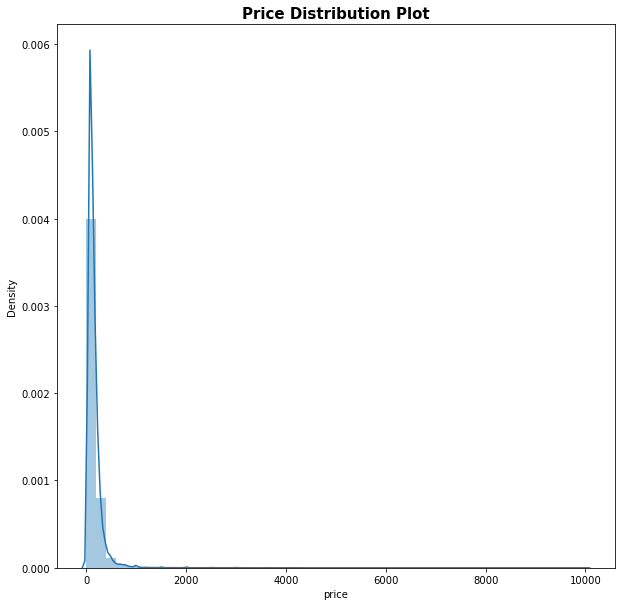

In [ ]:
#plot distribusi price
plt.figure(figsize=(10,10))
sns.distplot(df['price'])
plt.title("Price Distribution Plot",size=15, weight='bold')

/Users/riestiyazain/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log-Price Distribution Plot')

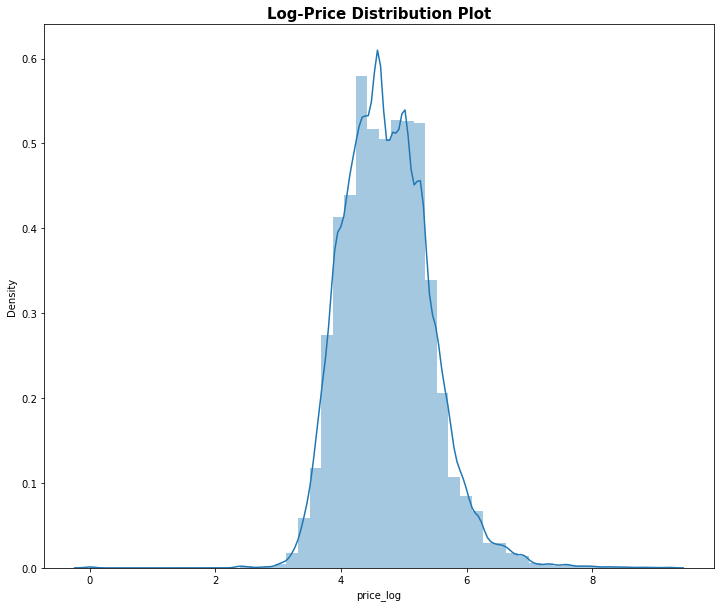

In [ ]:
# log distribution
df['price_log'] = np.log(df.price+1)

plt.figure(figsize=(12,10))
sns.distplot(df['price_log'])
plt.title("Log-Price Distribution Plot",size=15, weight='bold')

/Users/riestiyazain/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'calculated_host_listings_count Distribution Plot')

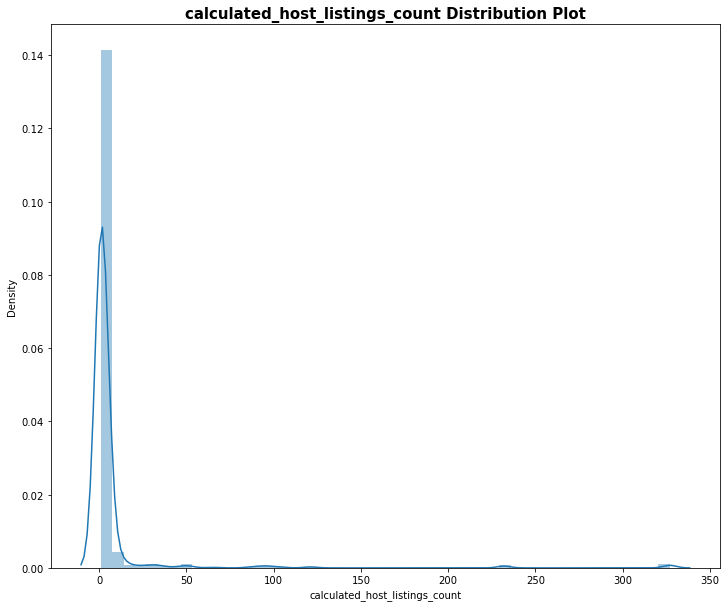

In [ ]:
#plot distribusi kolom review per month
plt.figure(figsize=(12,10))
sns.distplot(df['calculated_host_listings_count'])
plt.title("calculated_host_listings_count Distribution Plot",size=15, weight='bold')

In [ ]:
#drop kolom yang ga kepake
df = df.drop(columns=['name','id' ,'host_id','host_name', 
                                   'last_review','price'])

KeyError: "['name' 'id' 'host_id' 'host_name' 'last_review' 'price'] not found in axis"

In [ ]:
#check null data
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price_log                         0
dtype: int64

/Users/riestiyazain/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Review per Month Distribution Plot')

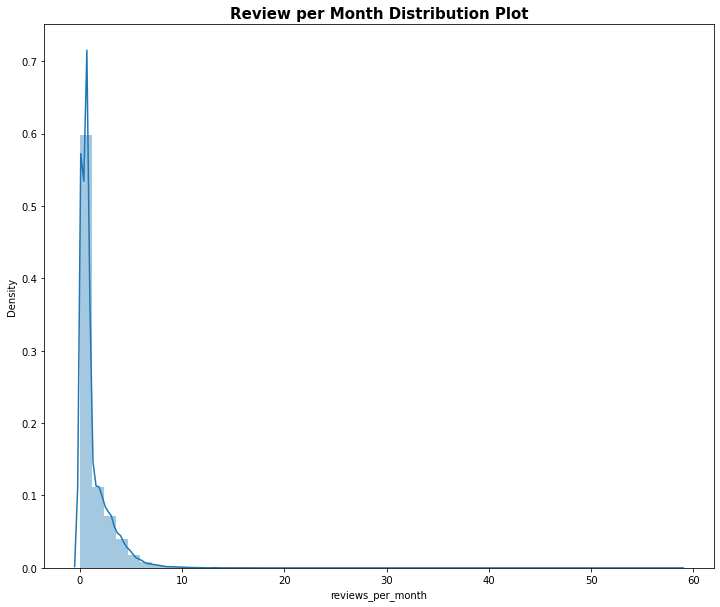

In [ ]:
#plot distribusi kolom review per month
plt.figure(figsize=(12,10))
sns.distplot(df['reviews_per_month'])
plt.title("Review per Month Distribution Plot",size=15, weight='bold')

/Users/riestiyazain/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log-reviews_per_month Distribution Plot')

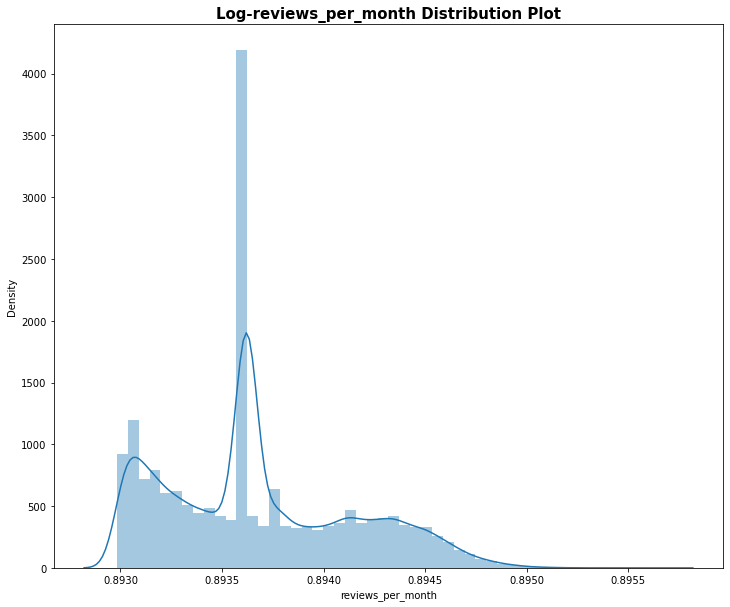

In [ ]:
df['reviews_per_month'] = np.log(df.reviews_per_month+1)

plt.figure(figsize=(12,10))
sns.distplot(df['reviews_per_month'])
plt.title("Log-reviews_per_month Distribution Plot",size=15, weight='bold')

In [ ]:
#handling missing/null value
median = df['reviews_per_month'].median()
df['reviews_per_month'].fillna(median, inplace=True)
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price_log                         0
dtype: int64

## regression

In [ ]:
#Getting dependent variable (feature) and independent variable (target/label)
X = df.drop(['price_log'],axis=1)
y = df['price_log']

#Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

# Using Multiple Linear Regression
# OLS Stands for Ordinary Least Square
# OLS Optimization Method for Linear Regression
ols_model = LinearRegression().fit(X_train, y_train)

# Predict in Training Dataset
y_train_pred = ols_model.predict(X_train)

# Predict in Test Dataset
y_test_pred = ols_model.predict(X_test)

In [ ]:
ols_model.coef_

array([ 5.49818605e-02,  5.51555225e-04,  9.63751197e-01, -3.58740646e+00,
       -7.21391499e-01, -1.46657922e-03, -8.36996911e-04,  3.83973959e-03,
        1.60238715e-04,  7.55203452e-04])

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#R^2
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

#MAE
print(mean_absolute_error(y_train, y_train_pred))
print(mean_absolute_error(y_test, y_test_pred))

#MSE
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_test, y_test_pred))

0.45842304342697615
0.4572200909858115
0.36673793736224486
0.3727631392163055
0.25985366722203096
0.2670953906718668


In [ ]:
# Using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor().fit(X_train, y_train)

y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)

In [ ]:
#R^2
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

#MAE
print(mean_absolute_error(y_train, y_train_pred))
print(mean_absolute_error(y_test, y_test_pred))

0.9436528917265092
0.5924860902698474
0.11538992961439953
0.3157919439314936
